<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/notebooks/katas/algorithms/DNN_FashionMNIST.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


## Instructions

This is a self-correcting exercise generated by [nbgrader](https://github.com/jupyter/nbgrader). 

Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Run subsequent cells to check your code.

---

# Kata: Fashion-MNIST Dataset

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) is analogous to the MNIST handwritten digits dataset. It consists of 60,000 28x28 grayscale images (pixel values between 0 and 255) of 10 fashion categories, along with a test set of 10,000 images. The goal here is to associate a fashion image with its class.

![](images/fashion-mnist-sprite.png)

Each training and test example is assigned to one of the following label (fashion category):

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## Package setup

In [1]:
# The mlkatas package contains various utility functions required by all katas
!pip install mlkatas

In [2]:
# Import base packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mlkatas

In [3]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10
%config InlineBackend.figure_format = 'retina'
sns.set()

In [30]:
# Import ML packages (edit this list if needed)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation, Dropout
from tensorflow.keras.datasets import fashion_mnist # Added in Keras 2.0.9
from tensorflow.keras.utils import to_categorical

print(f'TensorFlow version: {tf.__version__}')
print(f'Keras version: {tf.keras.__version__}')

TensorFlow version: 1.14.0
Keras version: 2.2.4-tf


## Step 1: loading the data

### Question

Load the Fashion-MNIST dataset included with Keras. Use variables named `train_images`, `train_labels`, `test_images` and `test_labels` to store the data.

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
print(f'Training images: {train_images.shape}. Training labels: {train_labels.shape}')
print(f'Training labels: {train_labels}')
assert train_images.shape == (60000, 28, 28)
assert train_labels.shape == (60000, )
assert test_images.shape == (10000, 28, 28)
assert test_labels.shape == (10000, )

Training images: (60000, 28, 28). Training labels: (60000,)
Training labels: [9 0 0 ... 3 0 5]


### Question

Display the first 10 test images.

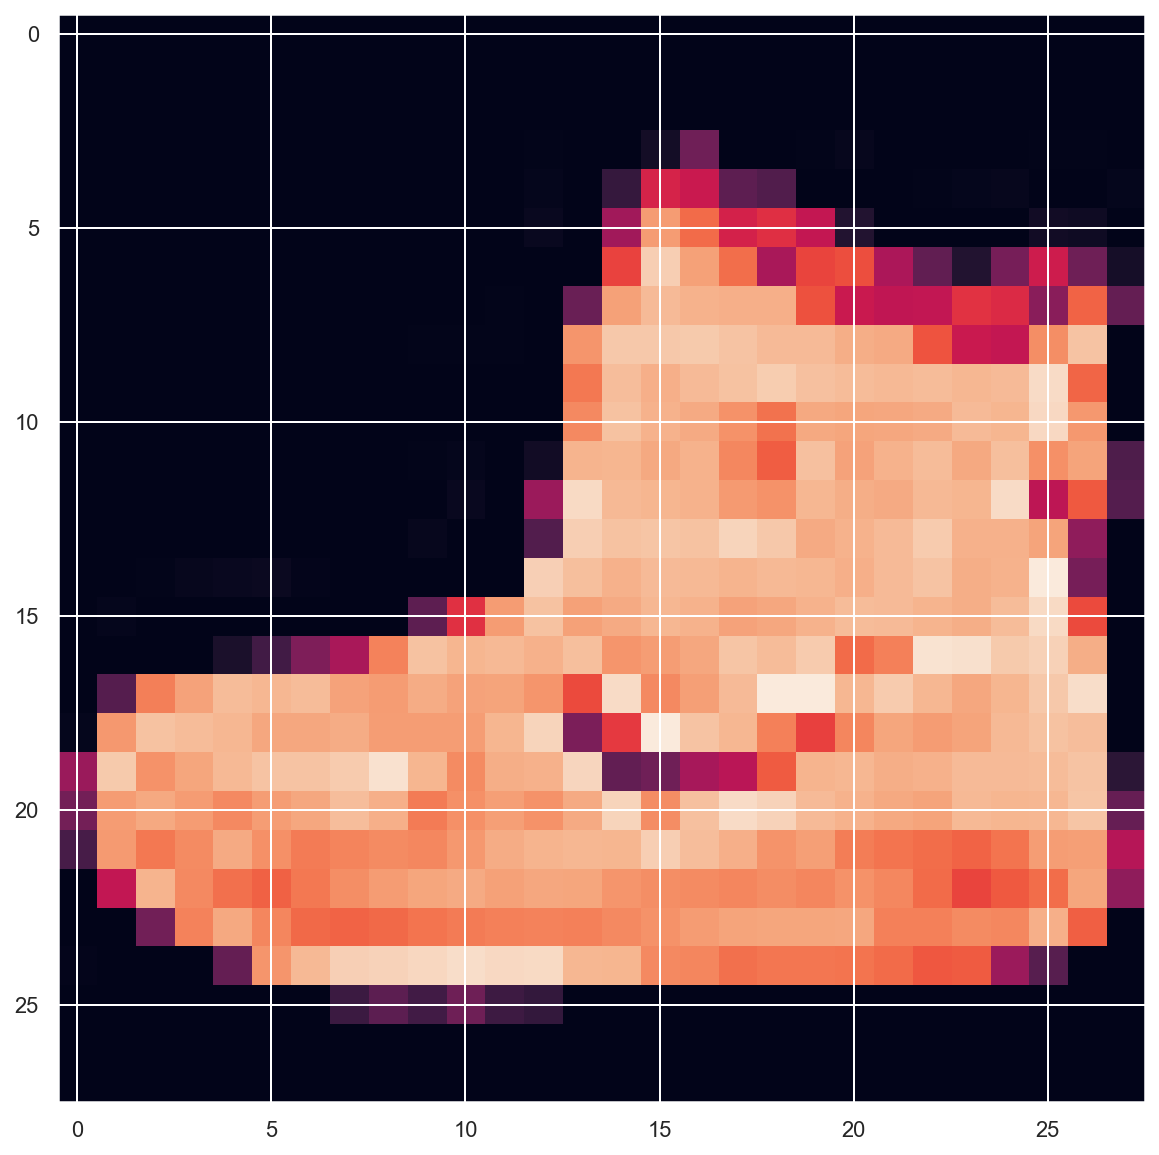

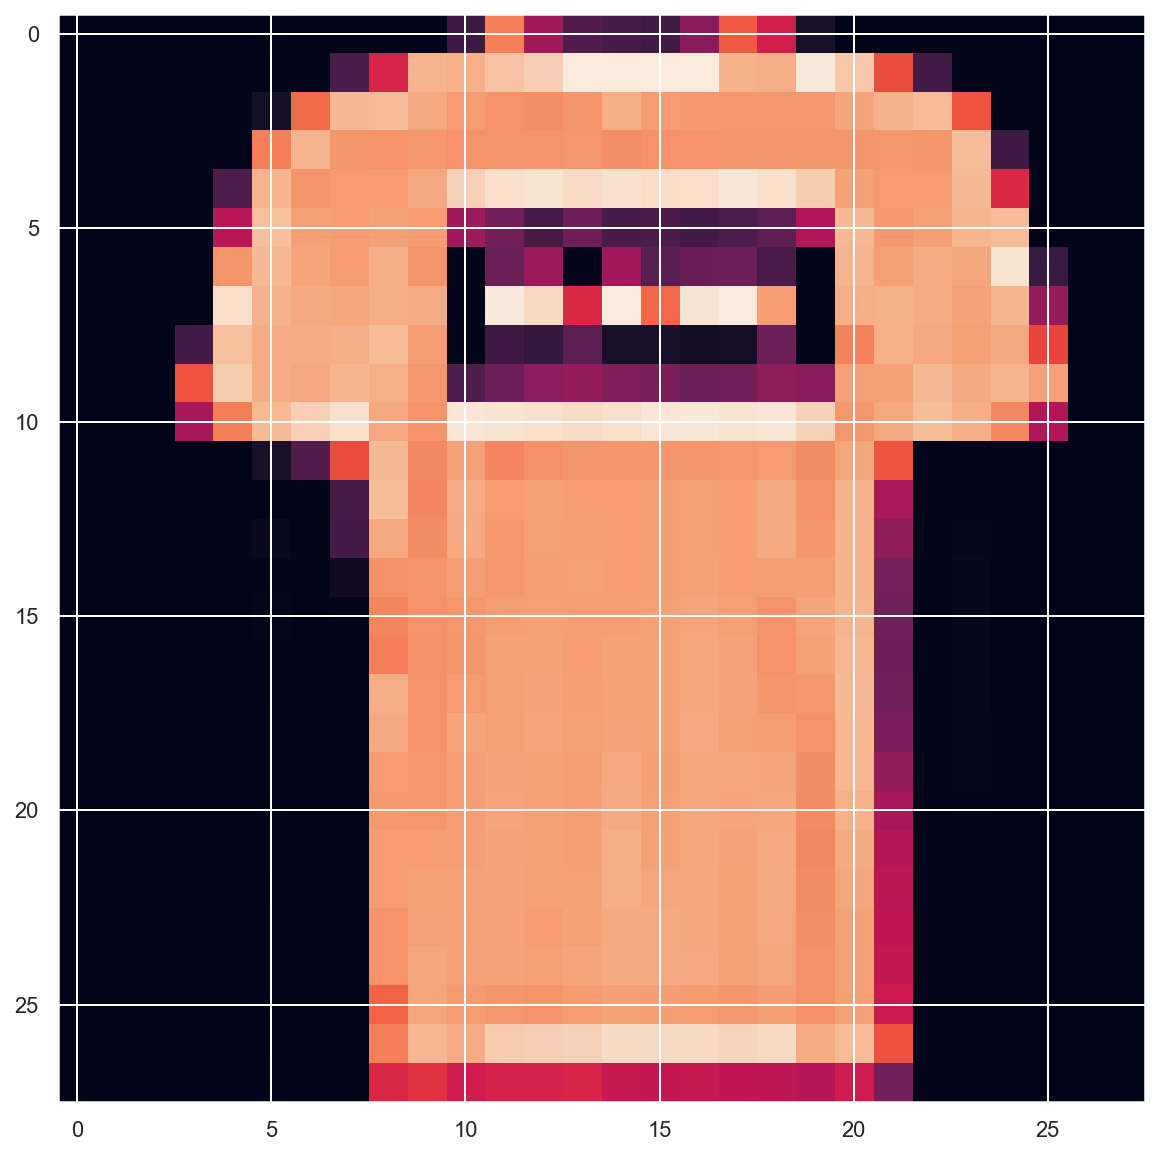

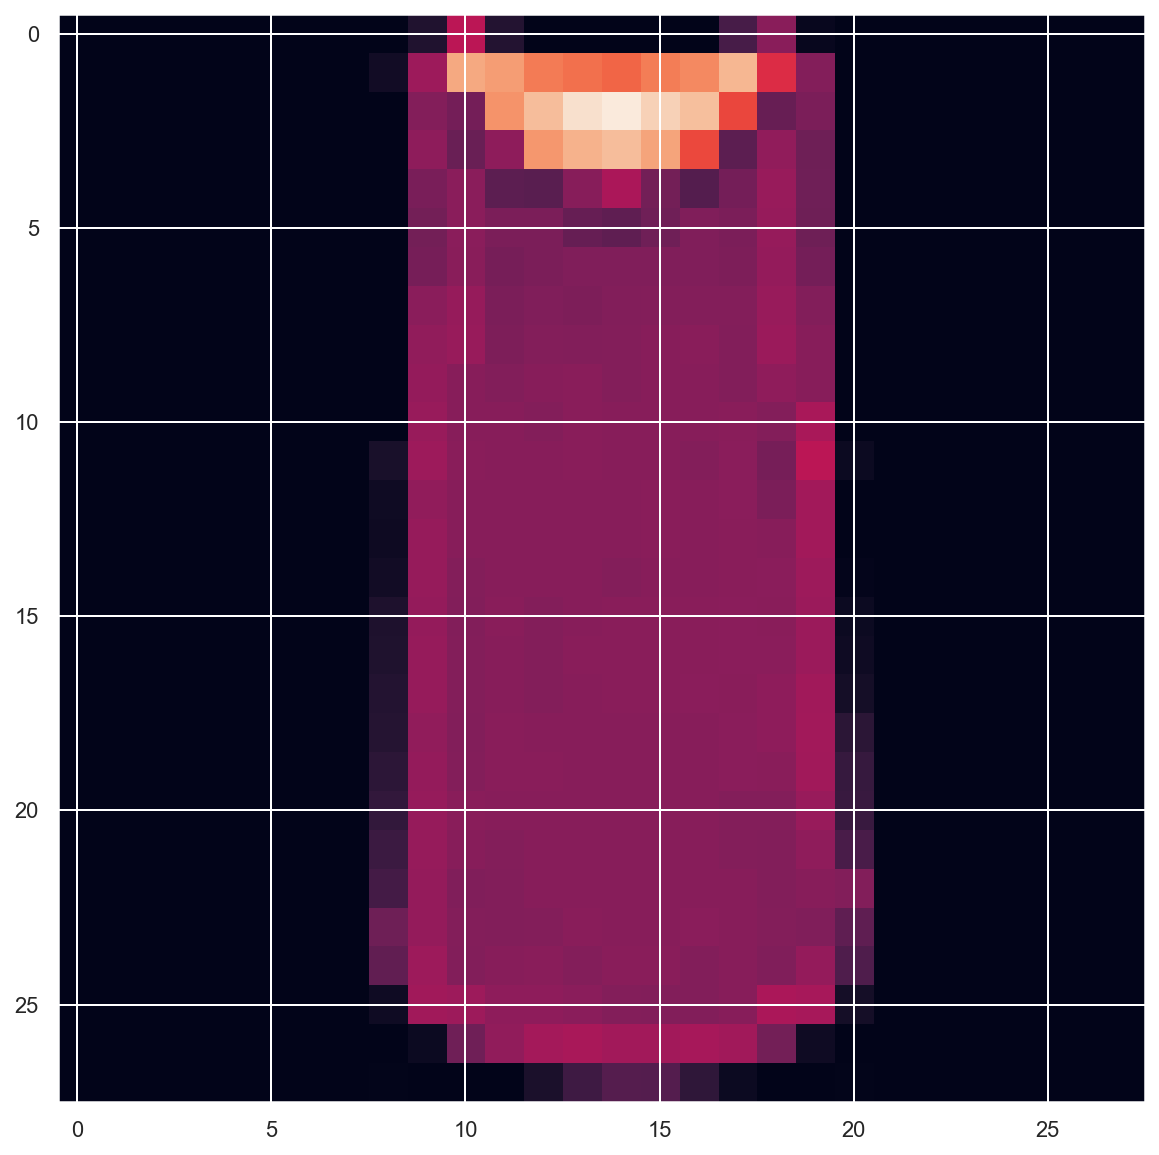

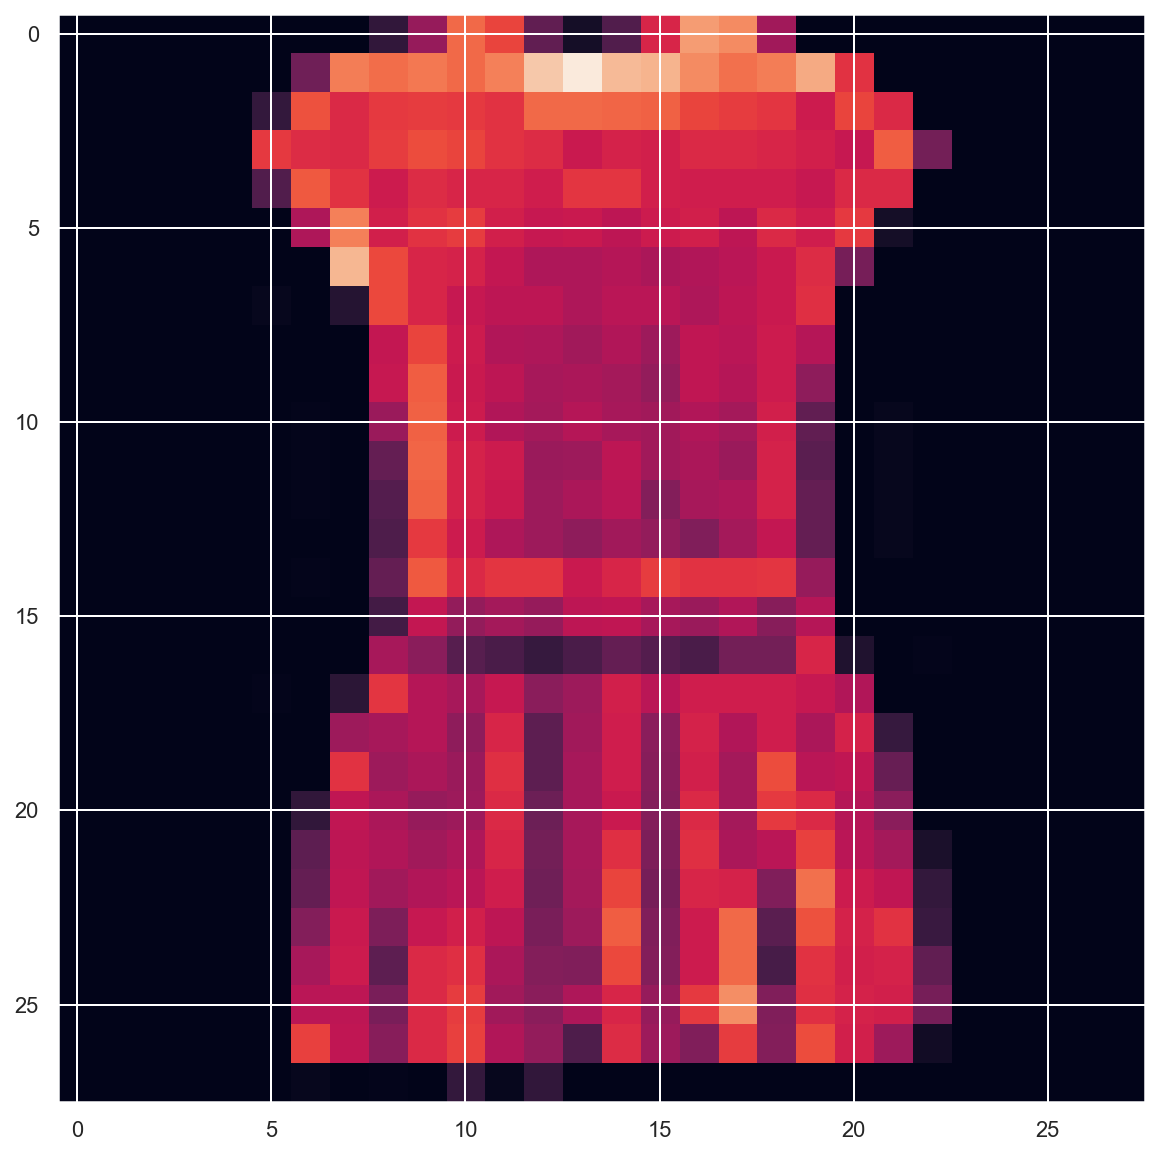

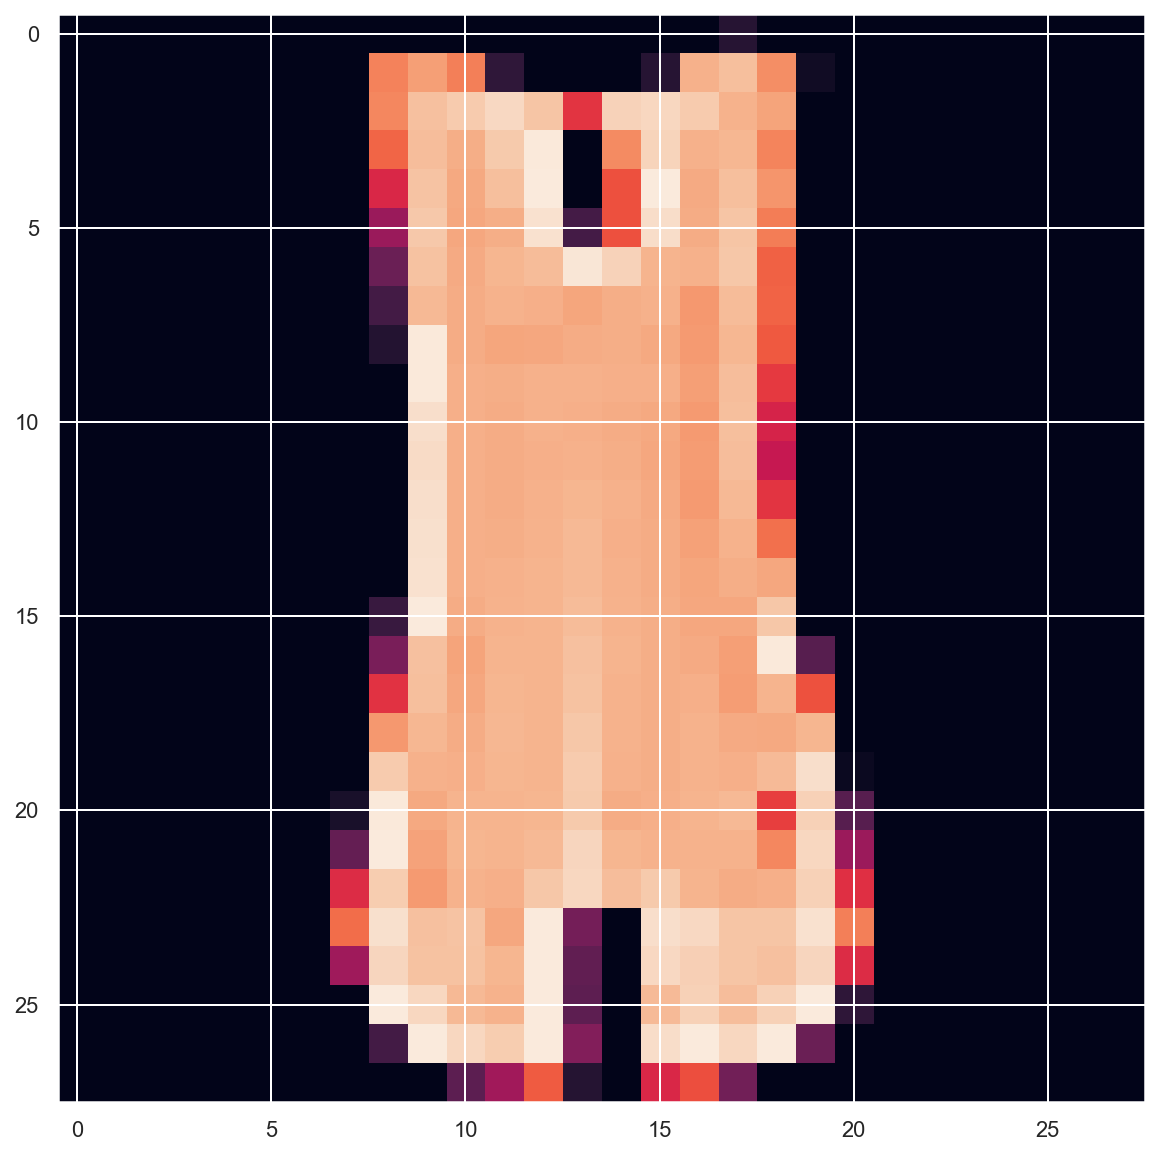

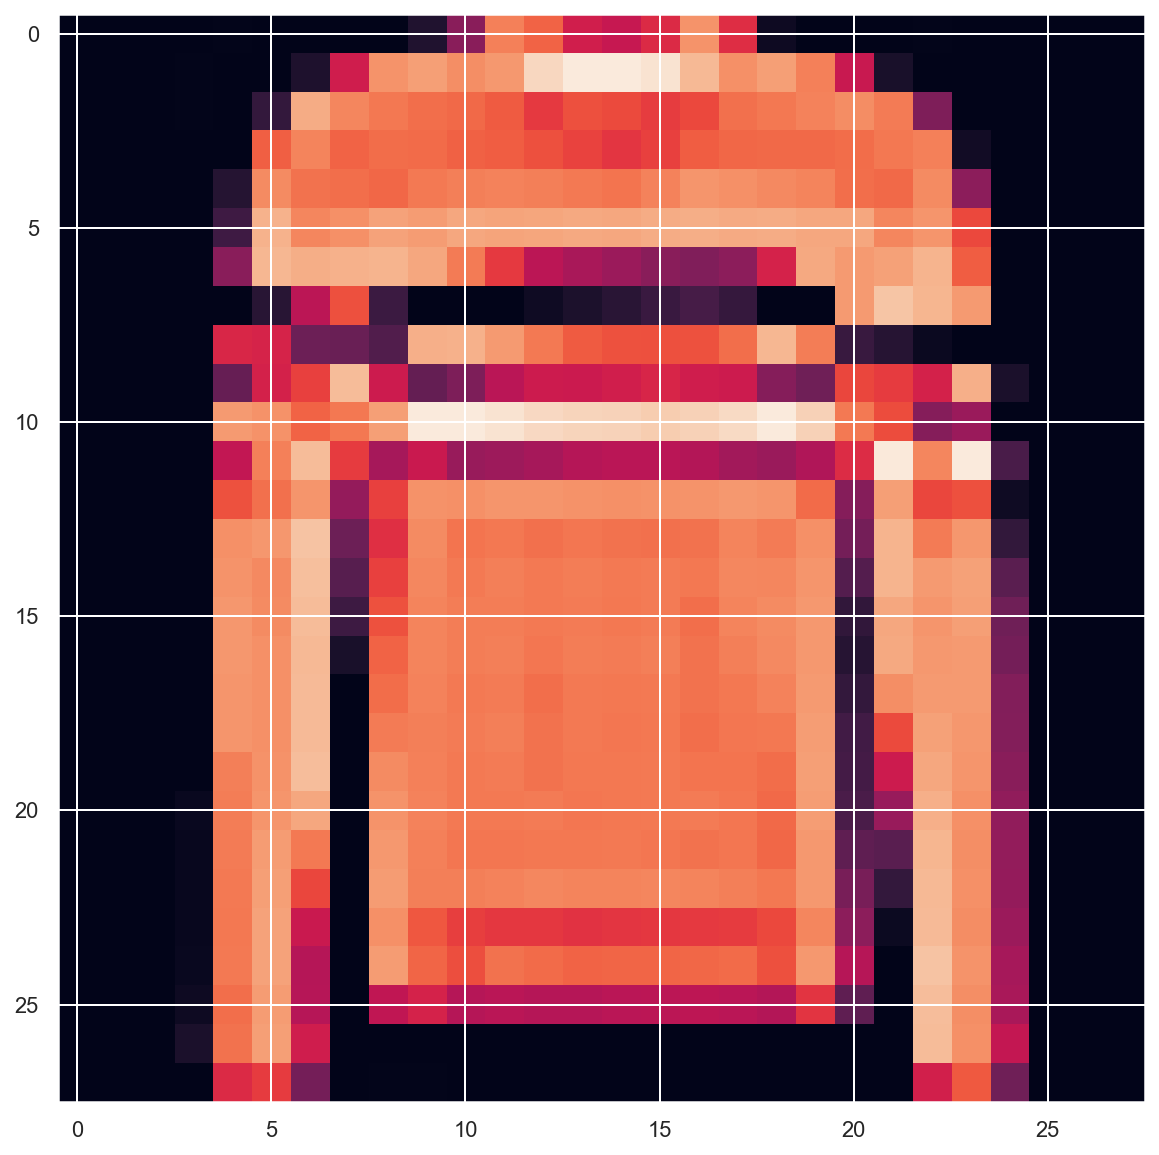

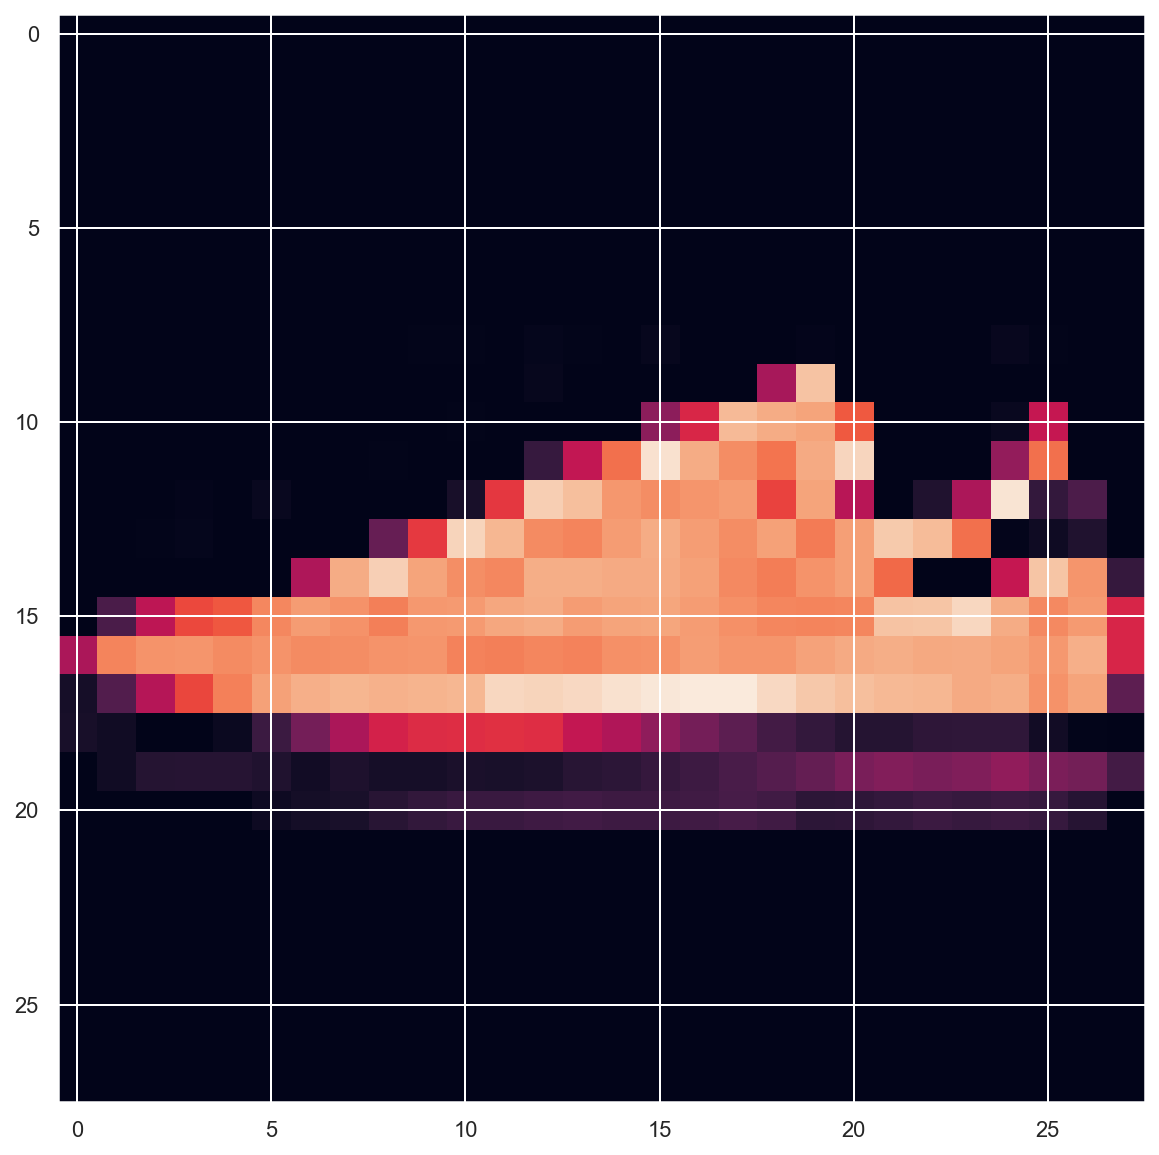

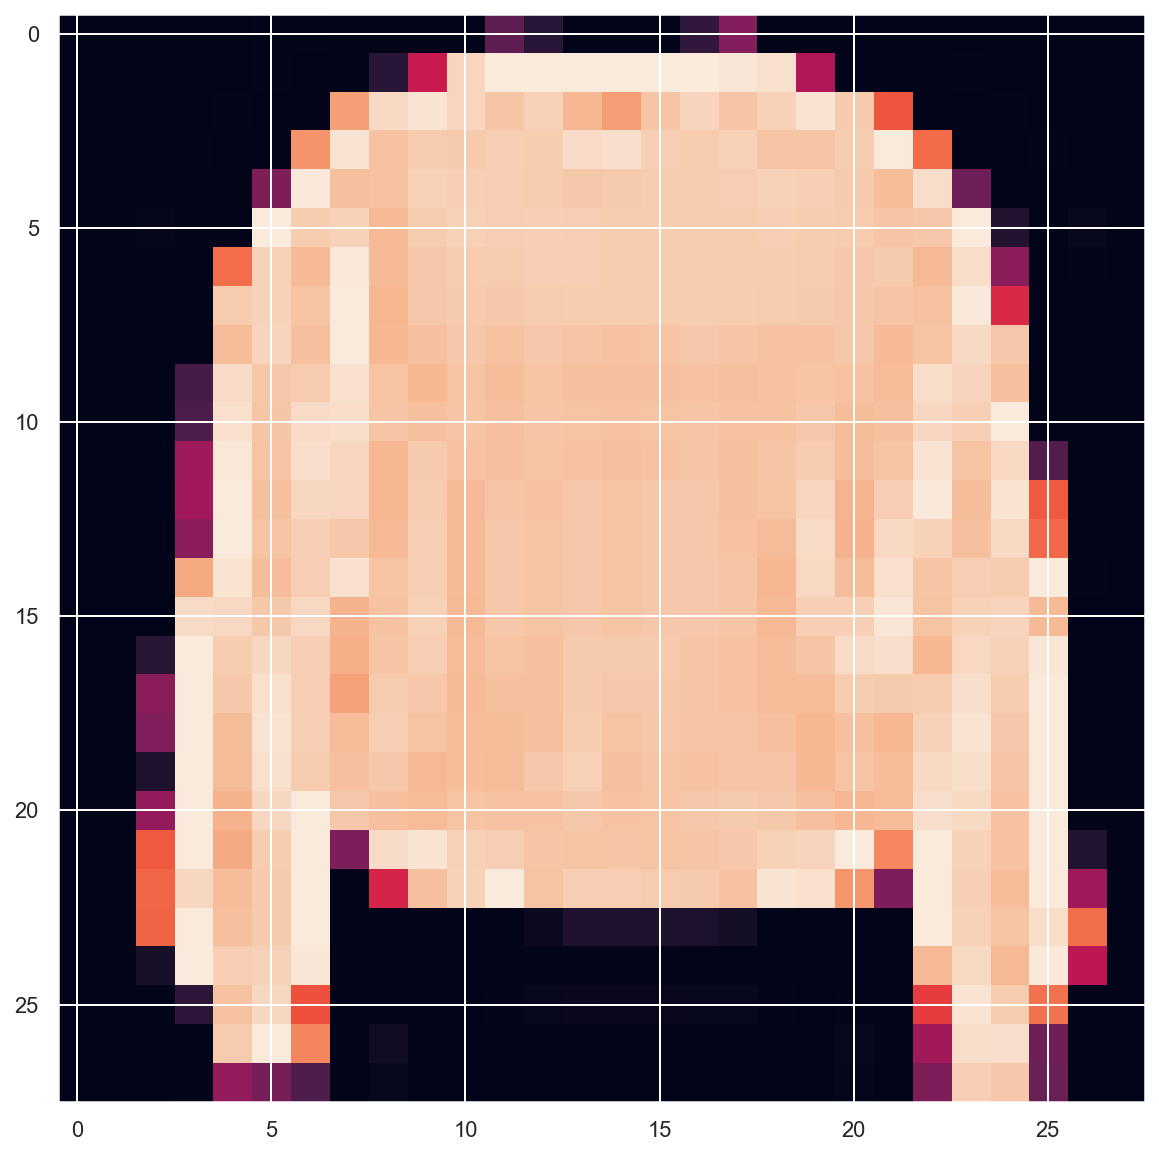

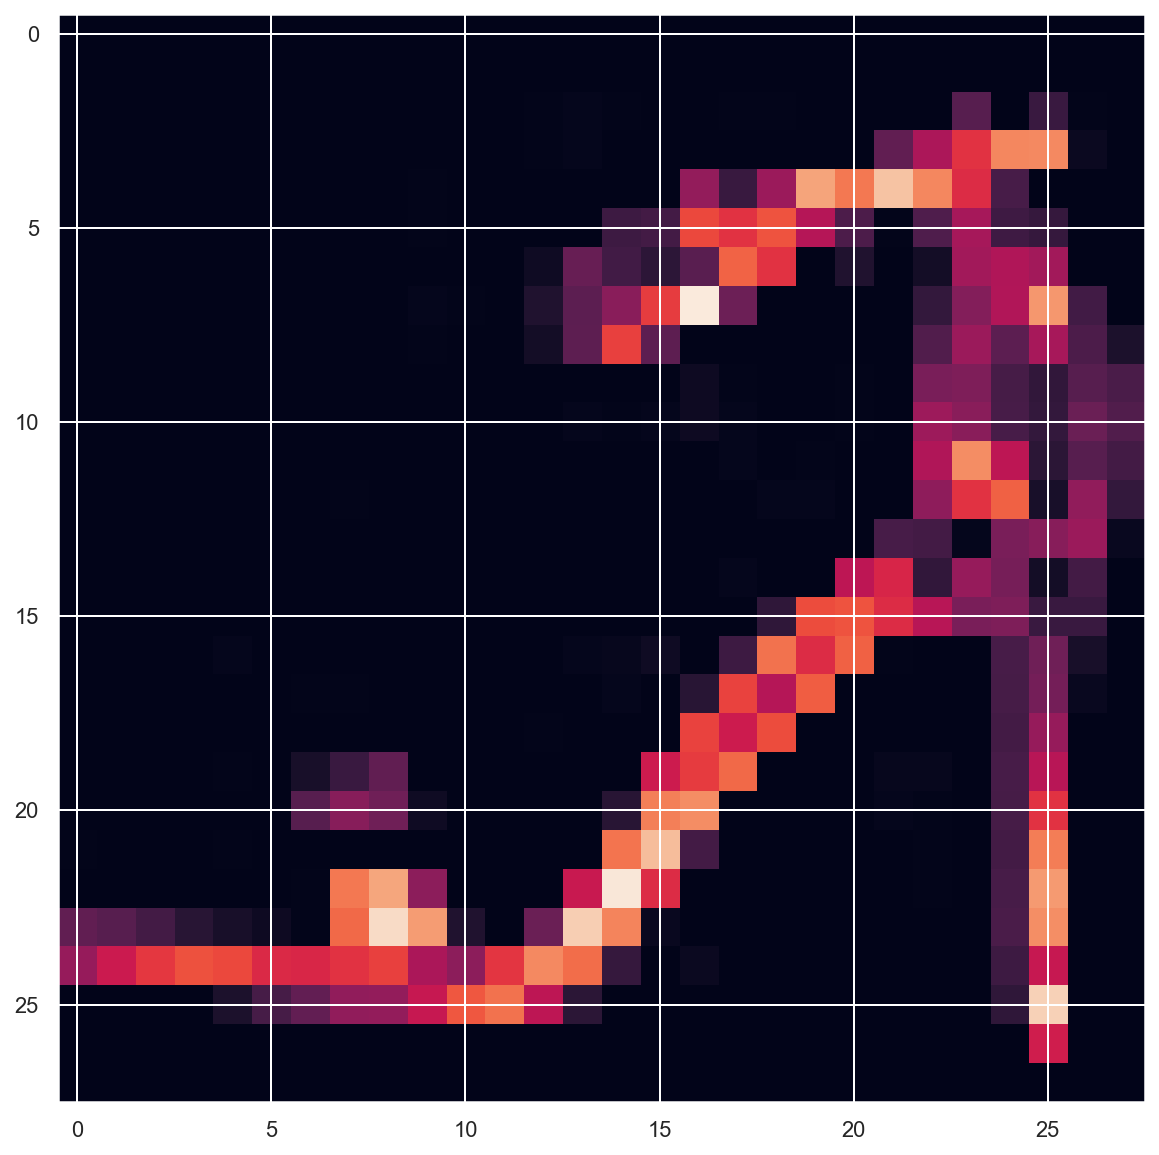

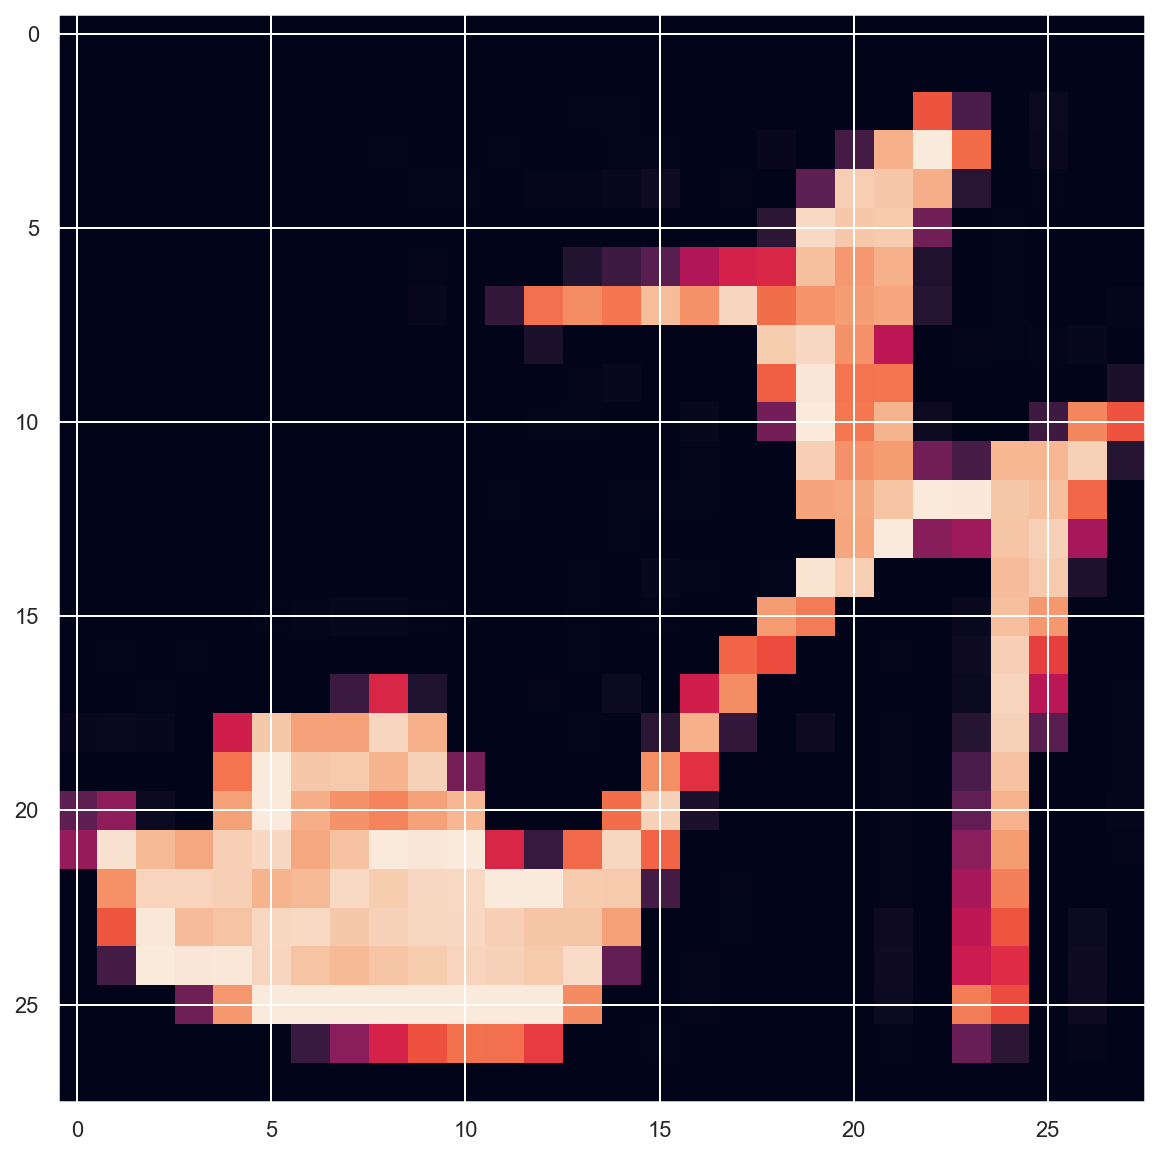

In [7]:
for img in train_images[:10]:
    plt.imshow(img)
    plt.show()

## Step 2: preparing the data

### Question

Create variables `x_train` and `x_test` by reshaping training and test images into 2D tensors with all values between 0 and 1.

In [18]:
x_train = train_images.reshape(-1,28*28)/255
x_test = test_images.reshape(-1,28*28)/255

In [19]:
print(f'x_train: {x_train.shape}. x_test: {x_test.shape}')
# Assert tensors shapes
assert x_train.shape == (60000, 784)
assert x_test.shape == (10000, 784)
# Assert tensors values
assert (np.amin(x_train, axis=0) >= 0).all() and (np.amax(x_train, axis=0) <= 1).all()
assert (np.amin(x_test, axis=0) >= 0).all() and (np.amax(x_test, axis=0) <= 1).all()

x_train: (60000, 784). x_test: (10000, 784)


### Question

One-hot encode training and test targets into variables `y_train` and `y_test`.

In [22]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [23]:
# Show a sample of encoded targets
df_y_train = pd.DataFrame(y_train)
df_y_train.sample(n=10)

,0,1,2,3,4,5,6,7,8,9
58195,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20240,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
52999,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23695,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15767,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
54097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
59299,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
print(f'y_train: {y_train.shape}. y_test: {y_test.shape}')

# Assert one-hot encoding of training and test targets
assert y_train.shape == (60000, 10)
assert y_test.shape == (10000, 10)

# Assert samples values
assert np.array_equal([0,0,0,0,0,0,0,0,0,1], y_train[0])
assert np.array_equal([1,0,0,0,0,0,0,0,0,0], y_train[1])
assert np.array_equal([0,0,0,0,0,0,0,0,0,1], y_test[0])
assert np.array_equal([0,0,0,0,0,1,0,0,0,0], y_test[9999])

y_train: (60000, 10). y_test: (10000, 10)


## Step 3: training a model 

### Question

Train a model on the data to obtain a test accuracy > 84%. Store the training history in a variable named `history`.

In [31]:
# Create and train a model
nb_targets = len(np.unique(train_labels))
input_shape = x_train.shape


model = Sequential([
    Dense(128, input_shape=(input_shape[1],)),
    Activation('relu'),
    Dropout(0.25),
    Dense(128),
    Dropout(0.25),
    Dense(64),
    Dropout(0.5),
    Dense(nb_targets),
    Activation('softmax'),
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics = ["accuracy"])

history = model.fit(x_train,y_train,epochs=10,batch_size=16, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 231us/sample - loss: 0.6688 - acc: 0.7654 - val_loss: 0.4596 - val_acc: 0.8391
Epoch 2/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.5227 - acc: 0.8151 - val_loss: 0.4628 - val_acc: 0.8354
Epoch 3/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.4863 - acc: 0.8272 - val_loss: 0.4227 - val_acc: 0.8483
Epoch 4/10
60000/60000 [==============================] - 13s 215us/sample - loss: 0.4649 - acc: 0.8375 - val_loss: 0.4134 - val_acc: 0.8533
Epoch 5/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.4492 - acc: 0.8421 - val_loss: 0.4155 - val_acc: 0.8525
Epoch 6/10
60000/60000 [==============================] - 13s 220us/sample - loss: 0.4443 - acc: 0.8424 - val_loss: 0.4033 - val_acc: 0.8630
Epoch 7/10
60000/60000 [==============================] - 13s 218us/sample - loss: 0.4284 - acc: 0.8490 

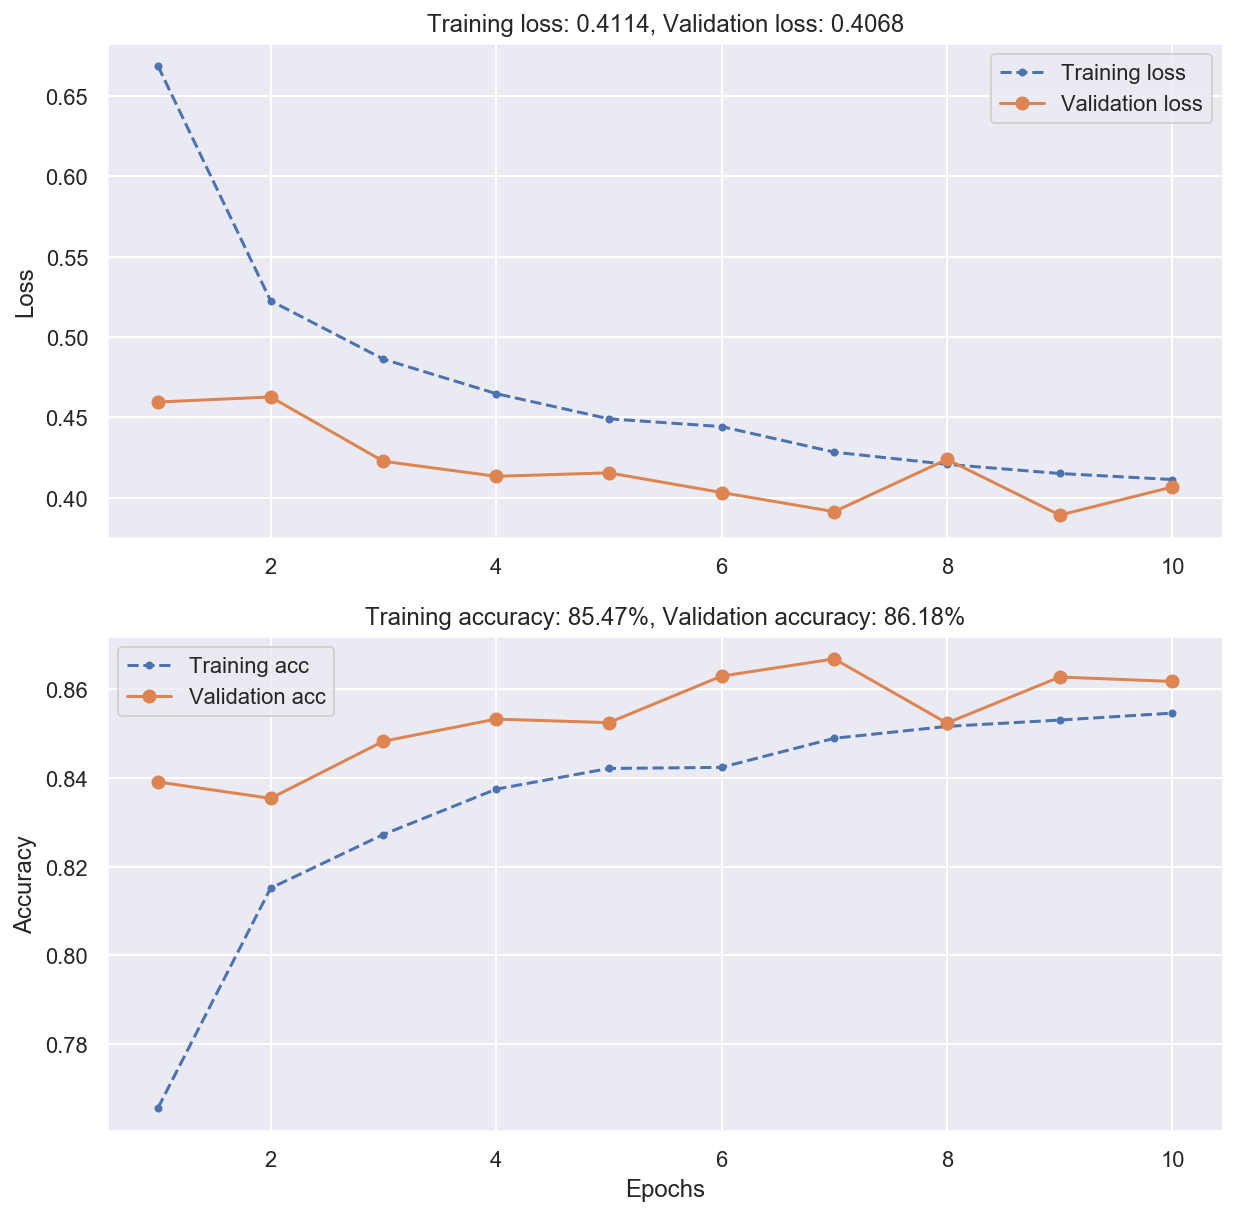

In [32]:
# Plot training history
mlkatas.plot_loss_acc(history)

In [33]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Test accuracy: {test_acc * 100}%')

assert test_acc > 0.84

Test accuracy: 86.18000149726868%


### Question

Show the first 10 test images with their predicted category ("dress", "shirt", etc).

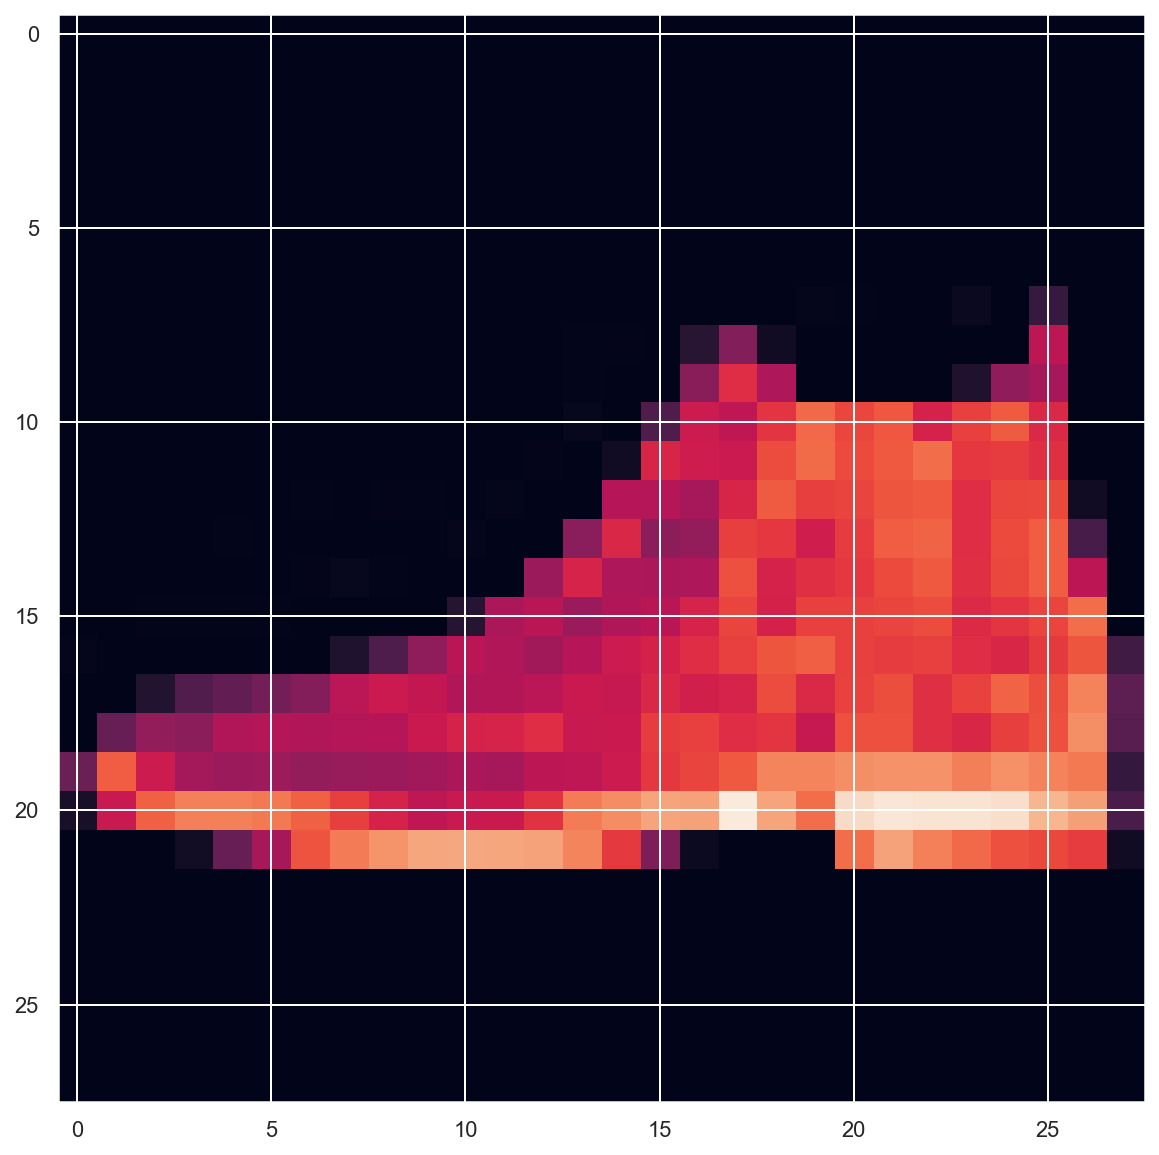

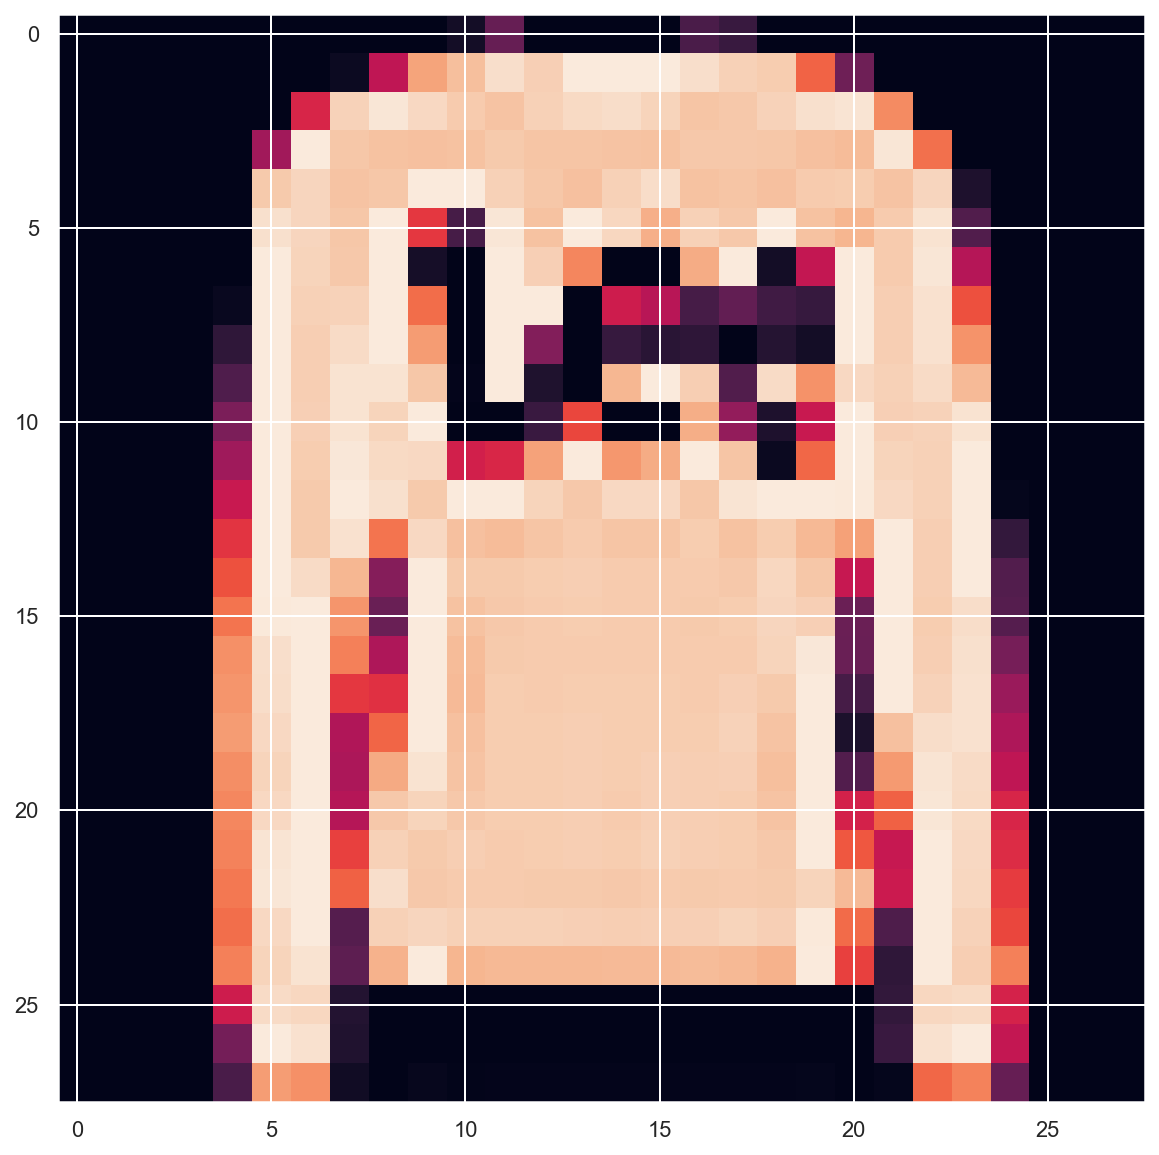

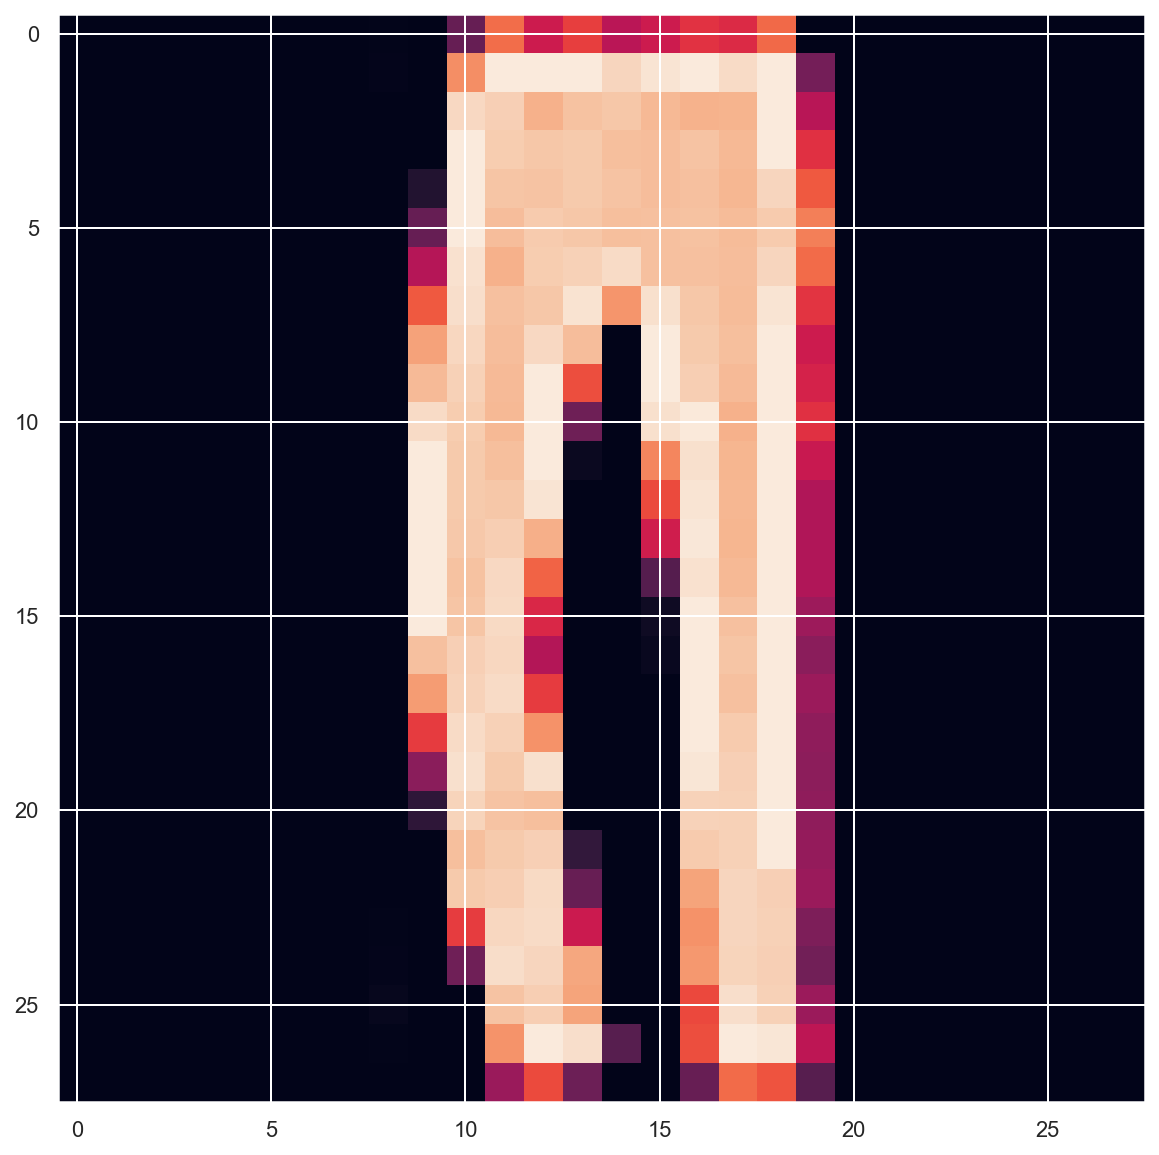

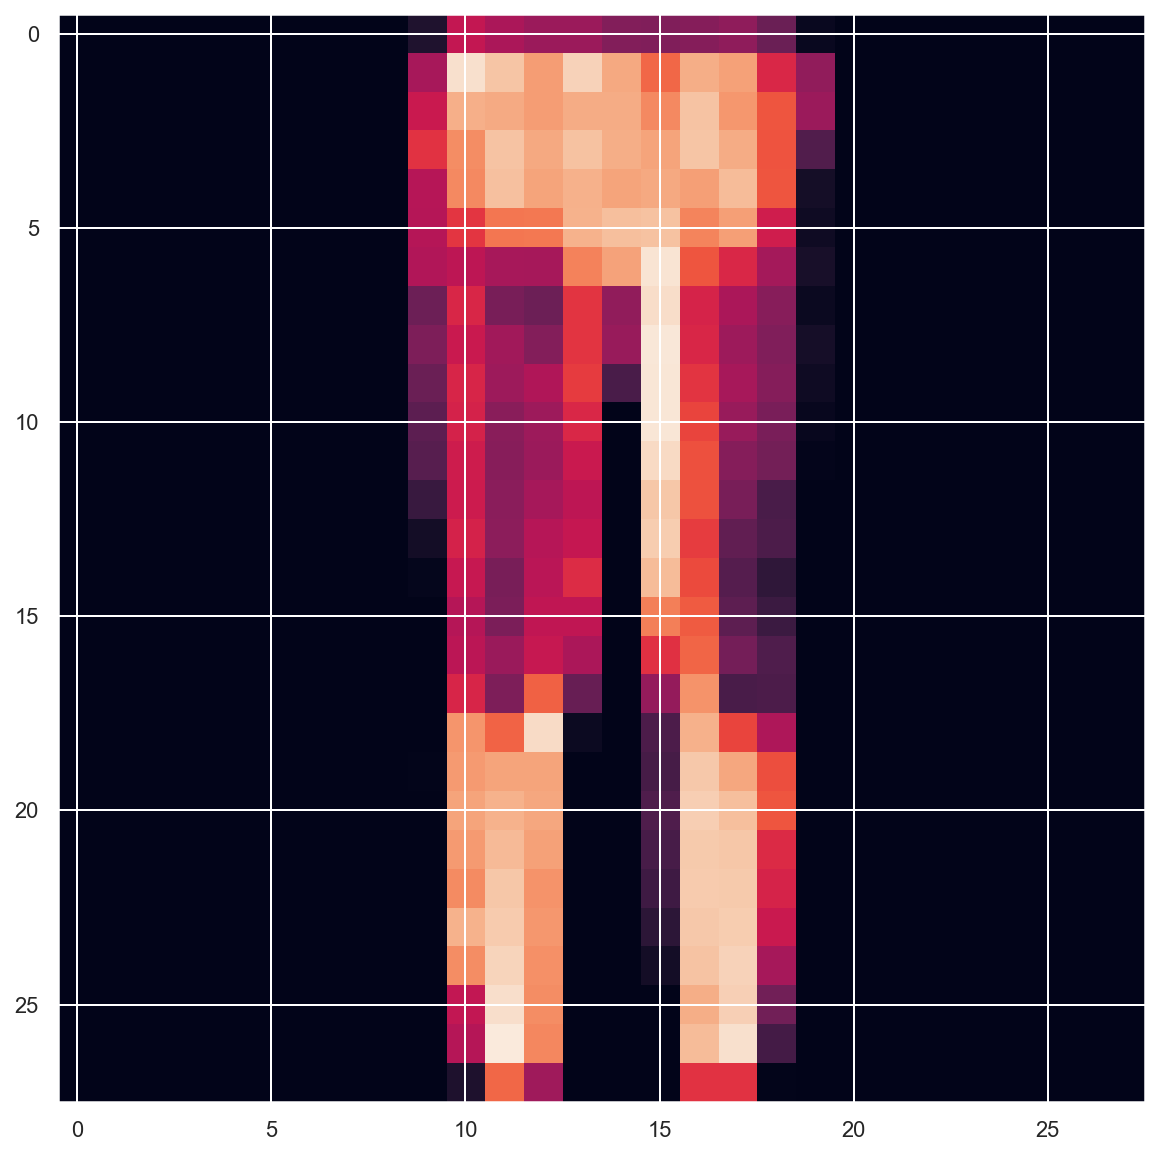

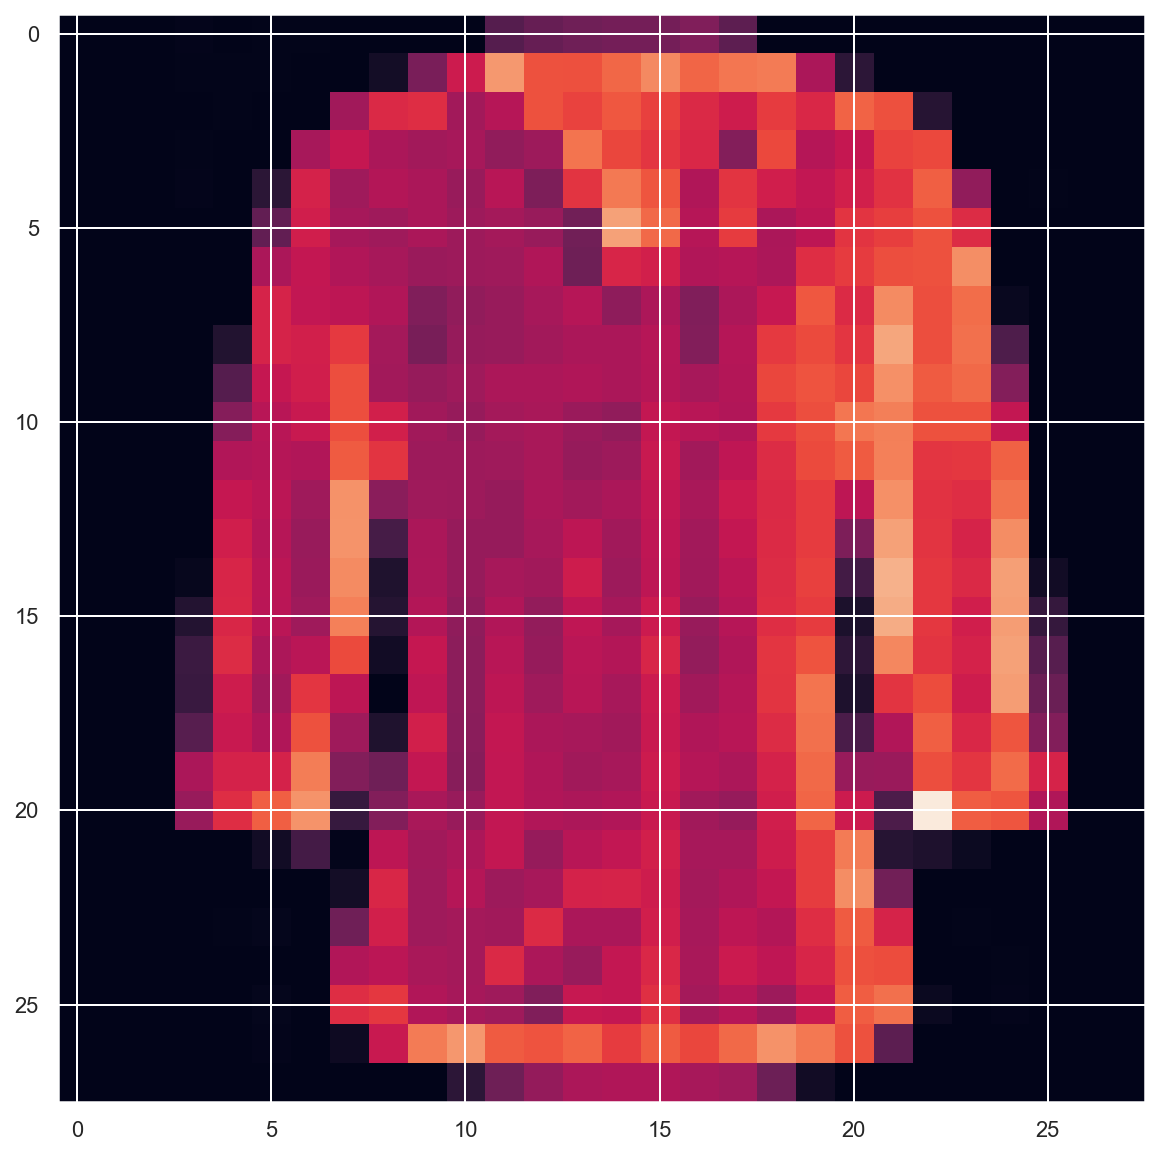

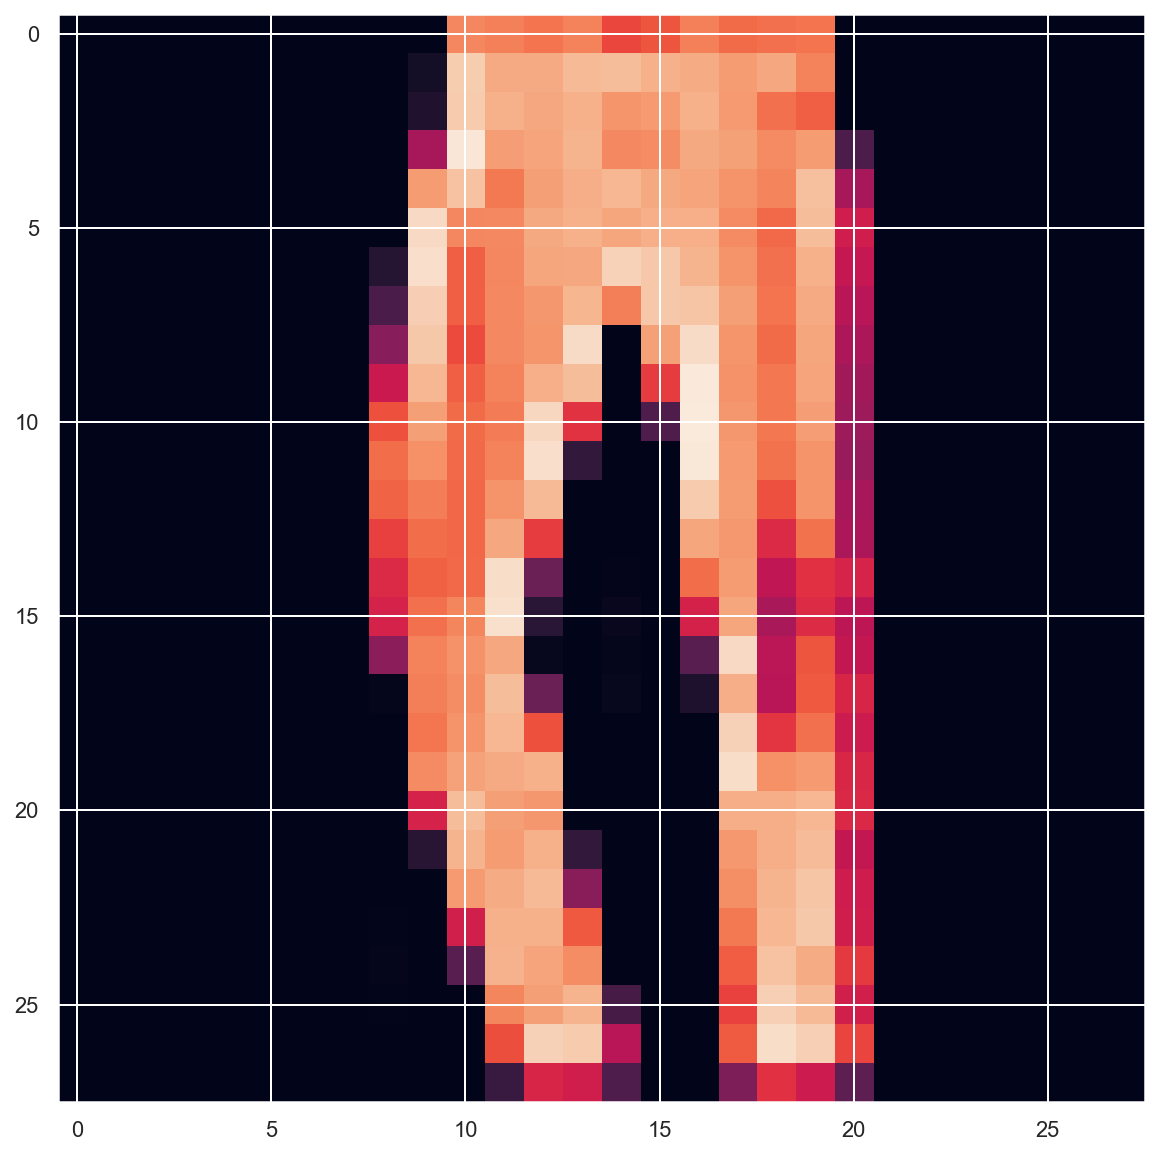

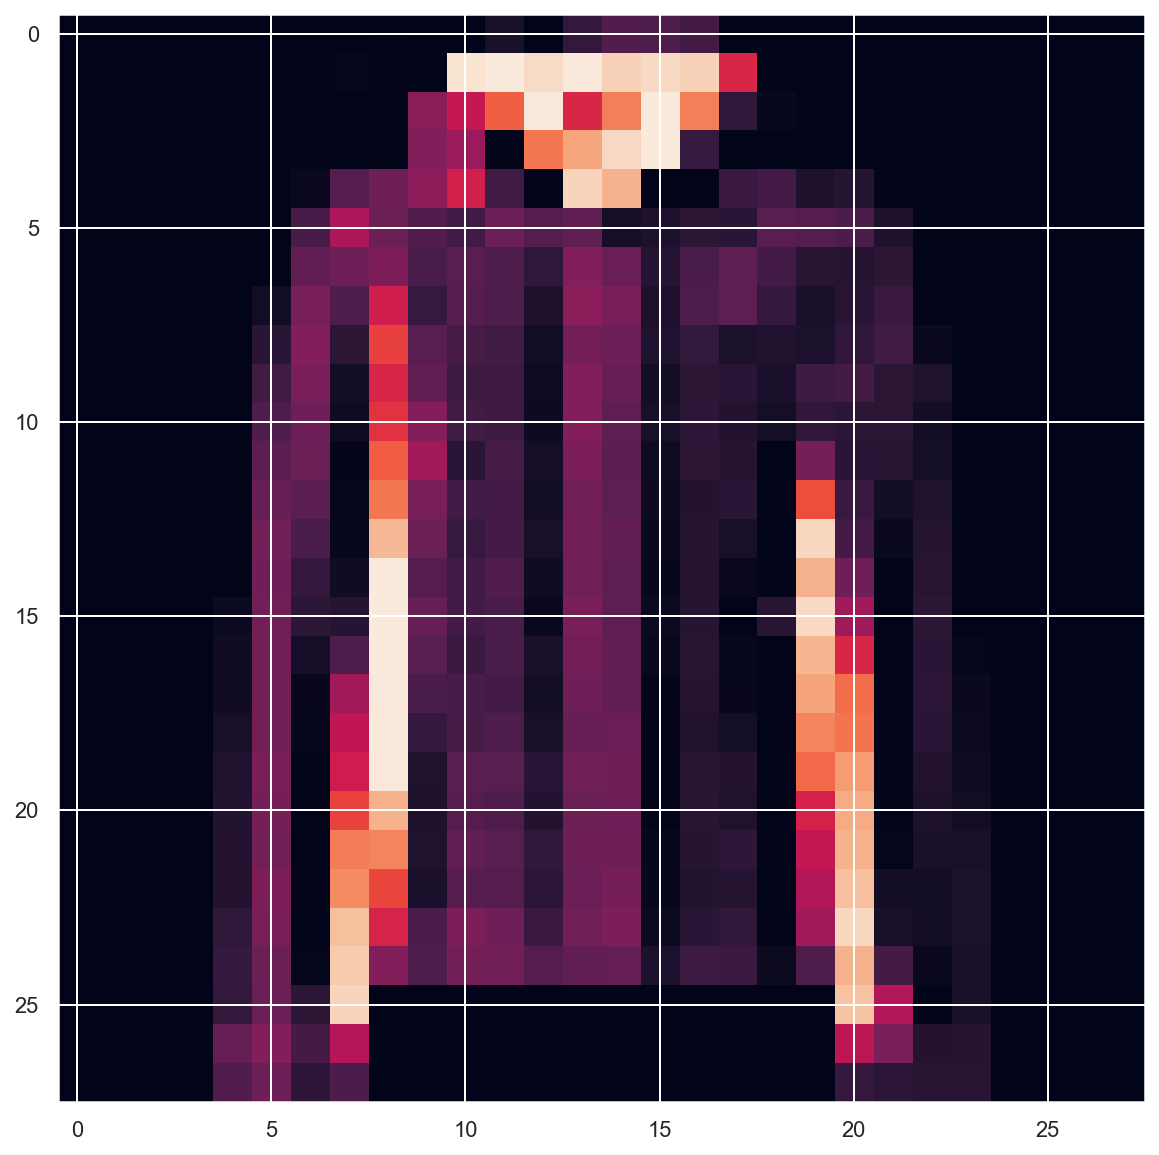

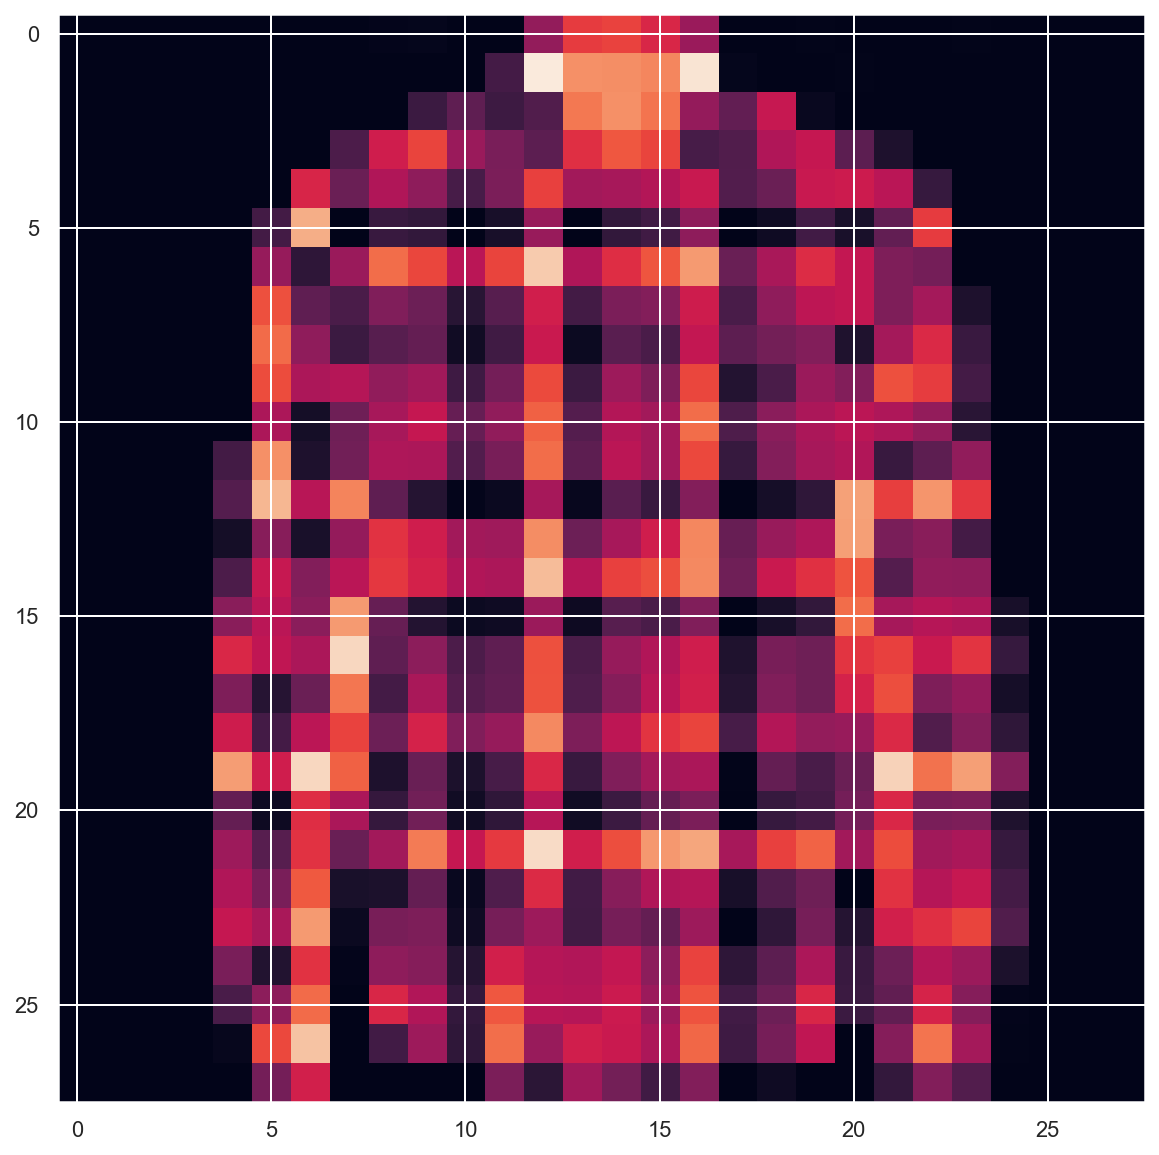

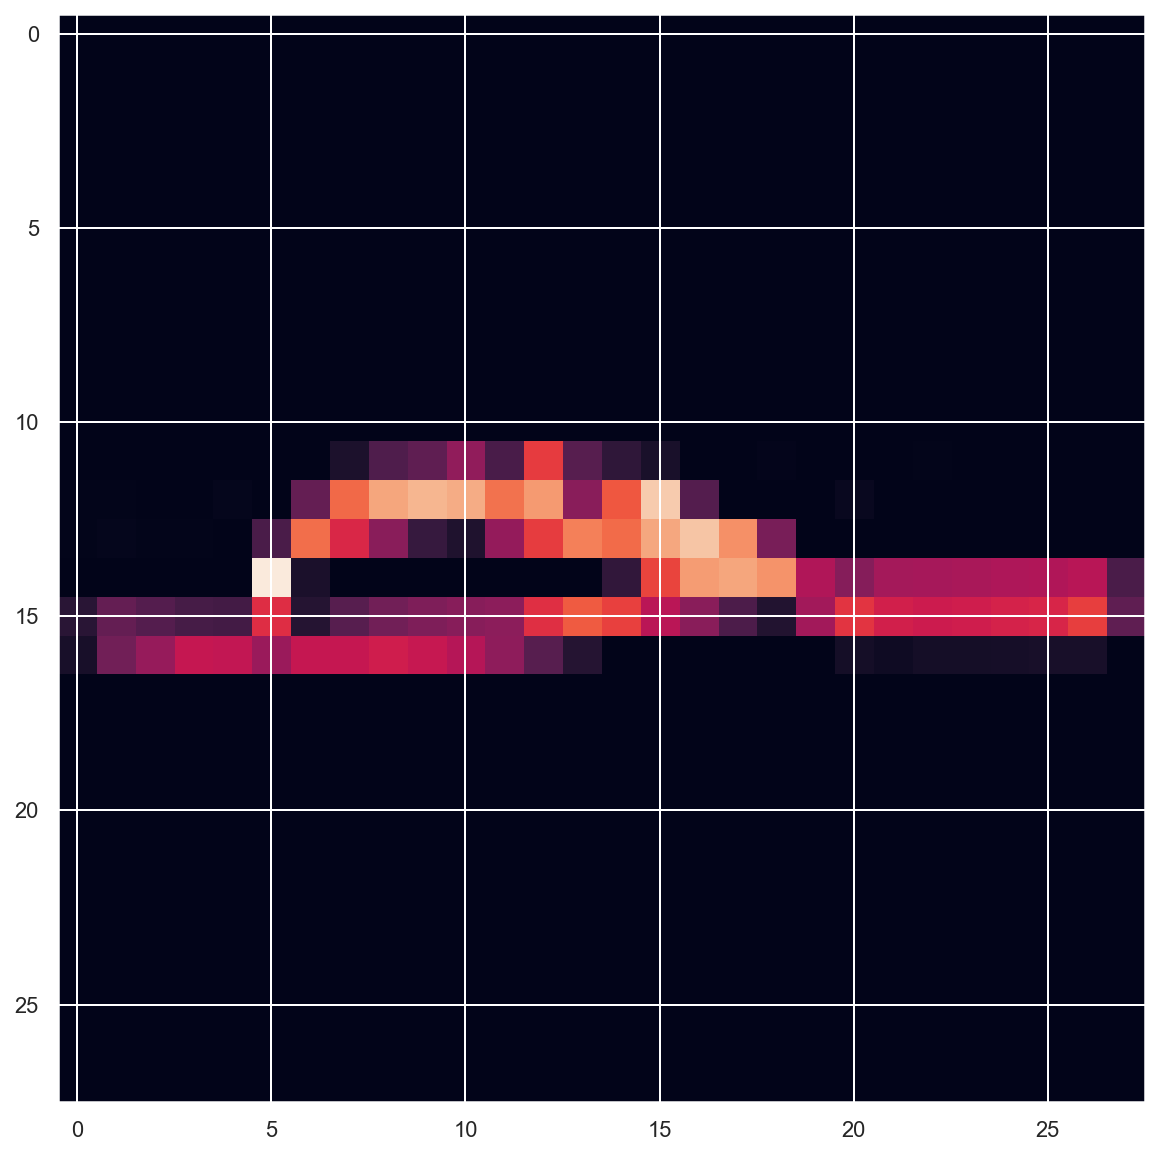

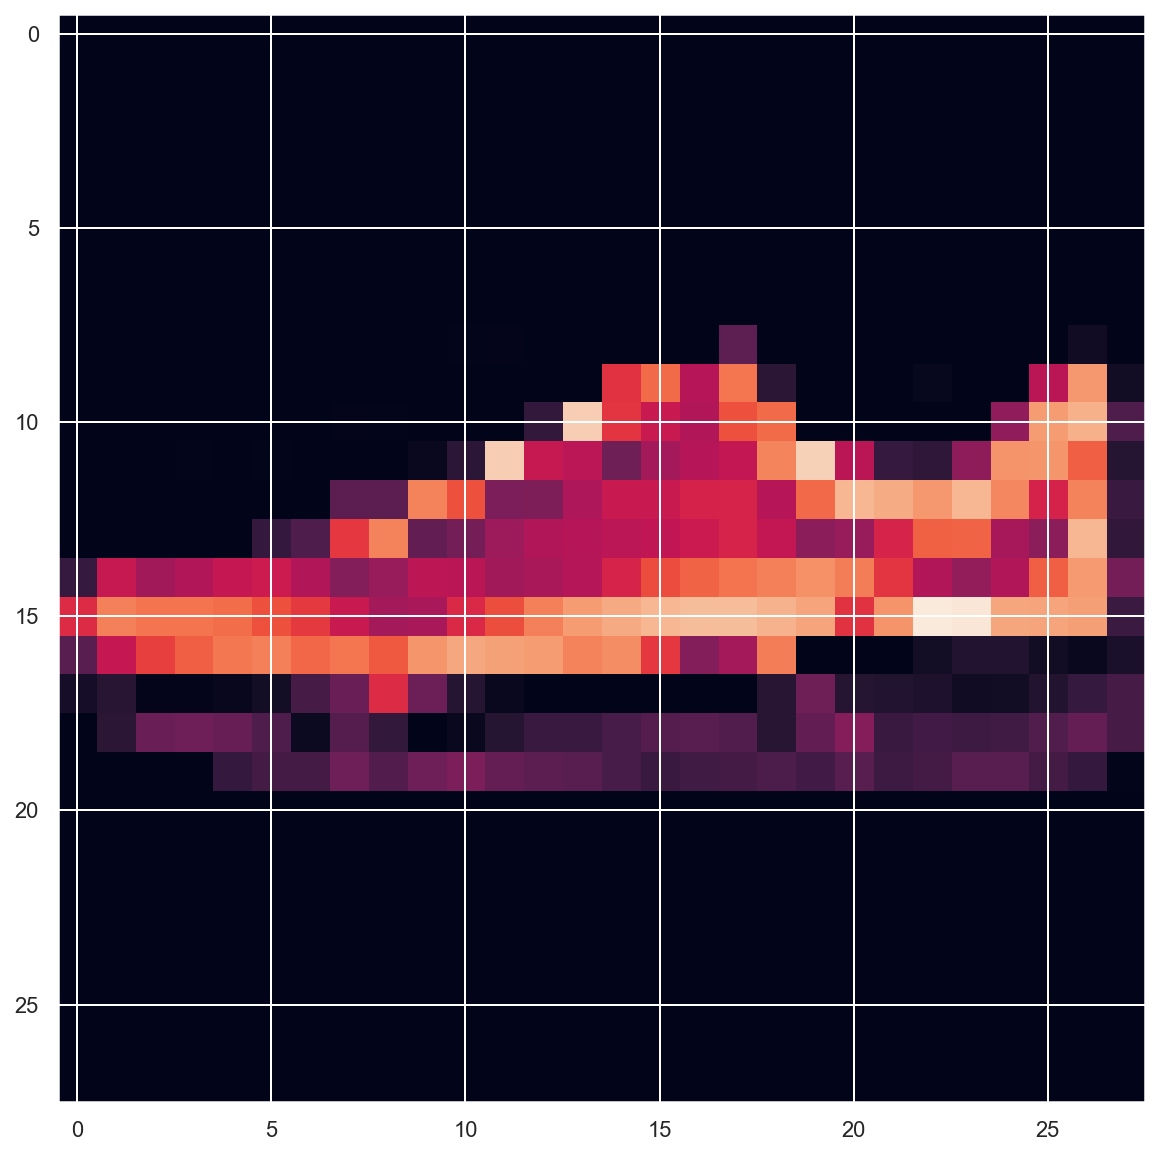

In [34]:
# Item descriptions, indexed by label value
descriptions = ['t-shirt', 'trouser', 'pullover', 'dress',
                'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
predictions = model.predict(x_test)

for i in range(10):
    img = test_images[i]
    pred = np.argmax(predictions[i])
    plt.title=descriptions[pred]
    imgplot = plt.imshow(img)

    plt.show()